In [16]:
import os
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt

data_folder = "fixed_csv"
all_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.csv')]

data_frames = []
for file in all_files:
    df = pd.read_csv(file, sep=',')
    data_frames.append(df)

# Combine all data
data = pd.concat(data_frames, ignore_index=True)



In [18]:
data.sample(10)

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
3917643,Municipal,16,102,2007,8,22,30,29,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
648224,Municipal,14,98,1999,11,10,20,19,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
82713,Municipal,10,5,1997,4,14,48,8,Martes,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Revisadas
9446974,Municipal,20,434,2021,8,23,0,28,lunes,Sin accidente en esta zona,...,0,0,0,0,0,0,0,0,Certificado cero,Cifras Definitivas
6872561,Municipal,19,39,2014,7,16,3,25,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
4051944,Municipal,25,1,2007,5,18,0,11,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
7795024,Municipal,6,10,2017,5,4,19,29,Lunes,Accidente en no intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Revisadas
4568066,Municipal,28,22,2008,6,8,10,13,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
6081276,Municipal,19,39,2012,3,19,14,29,Jueves,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
2812035,Municipal,8,21,2005,3,15,10,4,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas


In [30]:
# Select only the ANIO and MES columns
anio_mes_data = data[['ANIO', 'MES']]

# Export the dataset to a CSV file
anio_mes_data.to_csv('anio_mes_data.csv', index=False)


In [19]:
from sklearn.preprocessing import StandardScaler

# Agrupar los datos por año y mes, contar el número de accidentes
df_agg = data.groupby(['ANIO', 'MES']).size().reset_index(name='ACCIDENT_COUNT')

# Crear una columna 'time' que representa el tiempo en años decimales
df_agg['time'] = df_agg['ANIO'] + (df_agg['MES'] - 1) / 12

# Agregar características polinomiales para capturar tendencias
df_agg['time_squared'] = df_agg['time'] ** 2
df_agg['time_cubic'] = df_agg['time'] ** 3

# Normalizar la variable 'time' y sus polinomios
scaler = StandardScaler()
df_agg[['time', 'time_squared', 'time_cubic']] = scaler.fit_transform(df_agg[['time', 'time_squared', 'time_cubic']])

# Seleccionar características y variable objetivo
X = df_agg[['time', 'time_squared', 'time_cubic']]
y = df_agg['ACCIDENT_COUNT']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)



In [20]:
print(df_agg.head())

   ANIO  MES  ACCIDENT_COUNT      time  time_squared  time_cubic
0  1997    1           18515 -1.726713     -1.722870   -1.719031
1  1997    2           18407 -1.716021     -1.712249   -1.708482
2  1997    3           20004 -1.705330     -1.701628   -1.697932
3  1997    4           20175 -1.694638     -1.691007   -1.687380
4  1997    5           20915 -1.683946     -1.680385   -1.676828


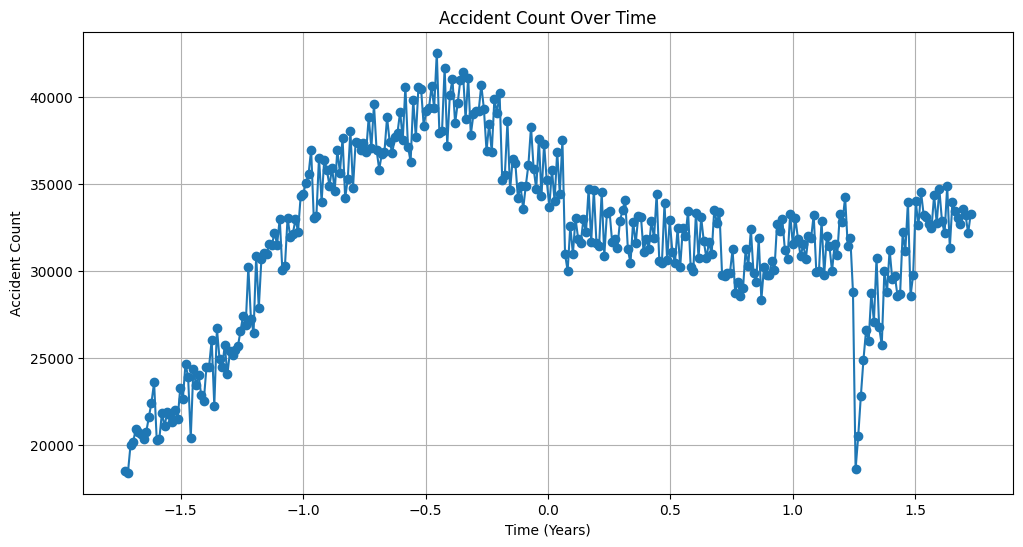

In [21]:
#plot accedent count by anio and mes
plt.figure(figsize=(12, 6))
plt.plot(df_agg['time'], df_agg['ACCIDENT_COUNT'], marker='o', linestyle='-')
plt.title('Accident Count Over Time')
plt.xlabel('Time (Years)')
plt.ylabel('Accident Count')
plt.grid()
plt.show()

In [22]:
print(X_train)

         time  time_squared  time_cubic
175  0.144338      0.142440    0.140540
300  1.480804      1.483113    1.485422
173  0.122955      0.121046    0.119135
55  -1.138668     -1.138092   -1.137509
33  -1.373886     -1.372164   -1.370438
..        ...           ...         ...
188  0.283331      0.281547    0.279761
71  -0.967601     -0.967723   -0.967838
106 -0.593391     -0.594646   -0.595894
270  1.160052      1.160720    1.161383
102 -0.636157     -0.637310   -0.638457

[291 rows x 3 columns]


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Inicializar modelos
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=0),
}

# Entrenar y almacenar predicciones
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = y_pred

In [25]:
def evaluate_models(y_true, y_preds):
    metrics = []
    for name, y_pred in y_preds.items():
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        metrics.append({
            'Model': name,
            'MSE': round(mse, 2),
            'MAE': round(mae, 2),
            'R²': round(r2, 2)
        })
    return pd.DataFrame(metrics)

# Mostrar resultados
results_df = evaluate_models(y_test, results)
print(results_df)

           Model         MSE      MAE    R²
0  Random Forest  3314433.96  1470.84  0.86
1        XGBoost  4071772.00  1644.42  0.83


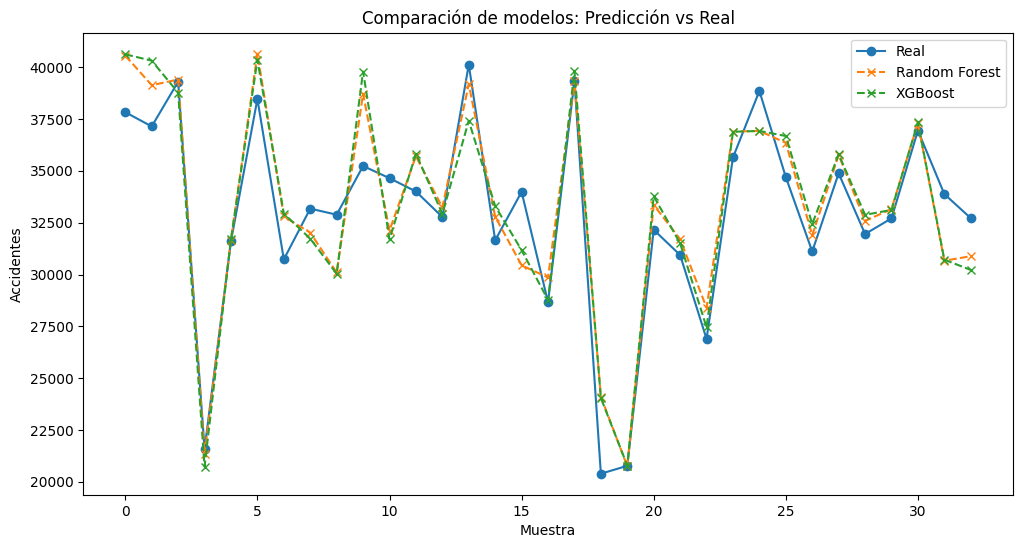

In [26]:
import matplotlib.pyplot as plt

# Gráfico de predicciones vs. realidad
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Real', marker='o')
for name, y_pred in results.items():
    plt.plot(y_pred, label=name, marker='x', linestyle='--')
plt.legend()
plt.title('Comparación de modelos: Predicción vs Real')
plt.xlabel('Muestra')
plt.ylabel('Accidentes')
plt.show()

        time     month_sin     month_cos  time_squared  time_cubic  \
0   1.865706  5.000000e-01  8.660254e-01      1.870512    1.875328   
1   1.876397  8.660254e-01  5.000000e-01      1.881281    1.886175   
2   1.887089  1.000000e+00  9.524105e-13      1.892051    1.897023   
3   1.897781  8.660254e-01 -5.000000e-01      1.902821    1.907872   
4   1.908472  5.000000e-01 -8.660254e-01      1.913591    1.918722   
..       ...           ...           ...           ...         ...   
67  2.582051 -8.660254e-01 -5.000000e-01      2.593032    2.604068   
68  2.592743 -1.000000e+00 -3.238228e-11      2.603831    2.614975   
69  2.603434 -8.660254e-01  5.000000e-01      2.614630    2.625883   
70  2.614126 -5.000000e-01  8.660254e-01      2.625430    2.636792   
71  2.624818 -3.381142e-11  1.000000e+00      2.636231    2.647702   

    Random Forest      XGBoost  
0        32973.75  32914.40625  
1        32973.75  32914.40625  
2        32973.75  32914.40625  
3        32973.75  32914.40

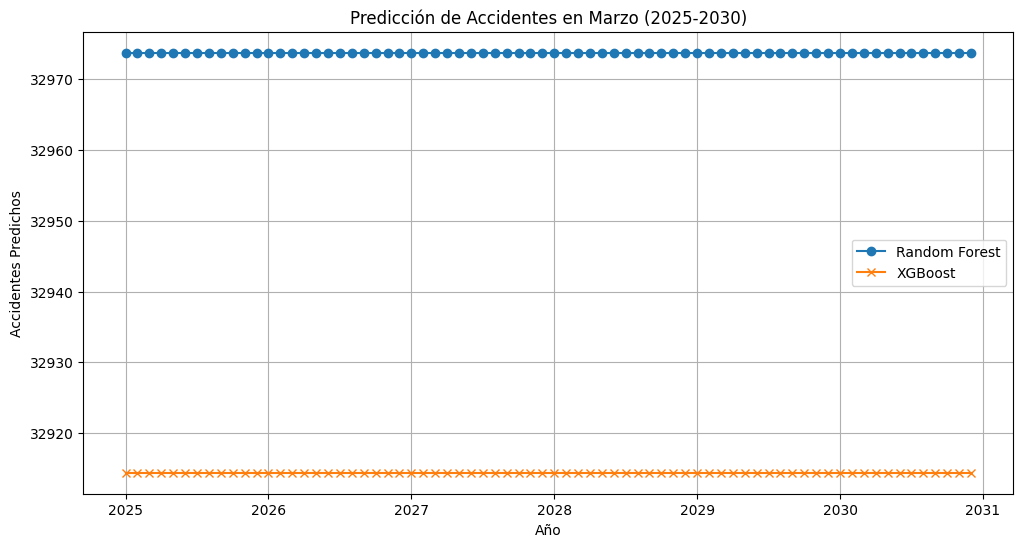

In [29]:
#Hacer una predicción para el año 2030 mes de marzo
# Crear un nuevo DataFrame para la predicción

# Crear un DataFrame para los meses de marzo desde 2025 hasta 2030
future_years = np.arange(2025, 2031, 1/12)  # Generar años con incrementos mensuales
future_data = pd.DataFrame({
    'time': future_years,
    'month_sin': np.sin(2 * np.pi * ((future_years % 1) * 12 + 1) / 12),
    'month_cos': np.cos(2 * np.pi * ((future_years % 1) * 12 + 1) / 12)
})

# Agregar las características polinomiales necesarias
future_data['time_squared'] = future_data['time'] ** 2
future_data['time_cubic'] = future_data['time'] ** 3

# Normalizar las características polinomiales usando el mismo scaler
future_data[['time', 'time_squared', 'time_cubic']] = scaler.transform(future_data[['time', 'time_squared', 'time_cubic']])



# Realizar las predicciones con ambos modelos
future_data['Random Forest'] = models['Random Forest'].predict(future_data[['time', 'time_squared', 'time_cubic']])
future_data['XGBoost'] = models['XGBoost'].predict(future_data[['time', 'time_squared', 'time_cubic']])

print(future_data)
future_data.to_csv("predicciones.csv", index=False)
# Graficar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(future_years, future_data['Random Forest'], label='Random Forest', marker='o')
plt.plot(future_years, future_data['XGBoost'], label='XGBoost', marker='x')
plt.title('Predicción de Accidentes en Marzo (2025-2030)')
plt.xlabel('Año')
plt.ylabel('Accidentes Predichos')
plt.legend()
plt.grid()
plt.show()
